In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt




# create a "symbol" called x
x = Symbol('x')


# function: 2*(x-8)^4+3*(y-0)^2
# function: Max(x-8,0)+3*|y-0|

In [2]:

class function_A():
    def f(self, x, y):
        return 2*(x-8)**4 + 3*(y-0)**2
    def dfdx(self, x):
        return 8*(x-8)**3
    def dfdy(self, y):
        return 6*(y-0)


In [3]:
#function: Max(x-8,0)+3*|y-0|
class function_B():
    def f(self, x, y):
        return np.maximum(x - 8, 0) + 4 * np.absolute(y - 0)# function value f(x)
    def dfdx(self, x):
        if x-8>0:
            return 1
        else:
            return 0
    def dfdy(self, y):
        return 4*np.sign(y)


In [4]:
#f(x,y) = x**2 + 10*y**2
class function_C():
    def f(self, x, y):
        return x**2 + 10*y**2
    def dfdx(self, x):
        return 2*x
    def dfdy(self, y):
        return 20*y

In [5]:
# relue furction Max(0,x)
class function_relu():
    def f(self, x, y):
        return np.maximum(0, x) 
    def dfdx(self, x):
        if x>0:
            return 1
        else:
            return 0
    def dfdy(self, y):
        return 0


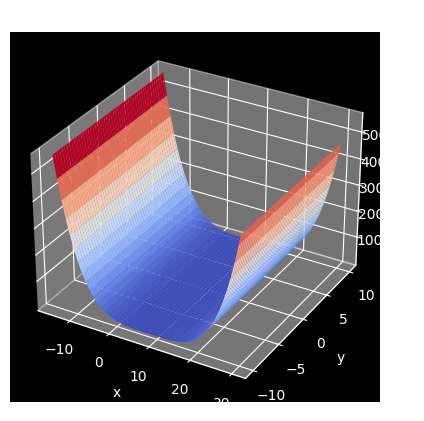

In [6]:

x_range = np.linspace(-15, 30, 100)
y_range = np.linspace(-10, 10, 100)

X, Y = np.meshgrid(x_range, y_range)

fn_A = function_A()


Z = fn_A.f(X, Y)



# plot the function as a surface
fig = plt.figure()
plt.style.use('dark_background')
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Function A')
plt.show()




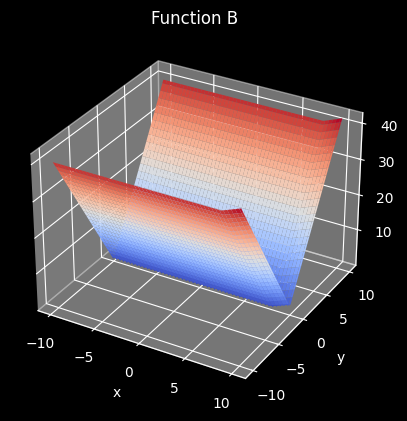

In [7]:
#plot function B

x_range = np.linspace(-10, 10, 100)
y_range = np.linspace(-10, 10, 100)

X, Y = np.meshgrid(x_range, y_range)

fn_B = function_B()
Z = fn_B.f(X, Y)

# plot the function as a surface
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Function B')
plt.show()	



In [8]:
def gradDescent_2d(fn,start,alpha,num_iters):
    
    x=start[0]; # initial value
    y=start[1];
    X=np.array([x]); 
    Y=np.array([y]);
    F_xy=np.array(fn.f(x, y));


    for k in range(num_iters):
        step_x = alpha*fn.dfdx(x) 
        step_y = alpha*fn.dfdy(y)
        x = x - step_x # update x 
        y = y - step_y # update y
        X=np.append(X,[x],axis=0); # x      
        Y=np.append(Y,[y],axis=0); # y
        F_xy=np.append(F_xy,[fn.f(x, y)]); # f(x,y)
    return (X,Y, F_xy)


In [9]:
def gradDescent_2d_Polyak(fn,start,fs,num_iters, reg):
    #starting point for gradient descent
    x=start[0];  # initial value x
    y=start[1]; # initial value y

    X=np.array([x]); # Store path of x
    Y=np.array([y]);    # Store path of y
    F_xy=np.array(fn.f(x, y));  # Store function value f(x,y)
    sum_x = 0; 
    sum_y = 0;

    for k in range(num_iters):

        #assuming f* is 0

        #df/dx
        sum_x += fn.dfdx(x)
        #(f(x,y)+f*)/(df/dx)^2
        n_x = (fn.f(x, y) + fs[0])/((sum_x )**2 +reg) 
        #df/dy
        sum_y += fn.dfdy(y)
        #(f(x,y)+f*)/(df/dy)^2
        n_y = (fn.f(x, y) + fs[1])/((sum_y )**2 +reg) 
        #gradient descent with changing alpha
        x = x -n_x*fn.dfdx(x)# update x 
        y = y -n_y*fn.dfdy(y)# update y


        X=np.append(X,[x],axis=0); # x      
        Y=np.append(Y,[y],axis=0); # y
        F_xy=np.append(F_xy,[fn.f(x, y)]); # f(x,y)

    return (X,Y, F_xy)




In [1]:
def gradDescent_2d_RMSProp(fn,start,alpha,num_iters, reg, beta):

    x=start[0]; # initial value
    y=start[1];

    X=np.array([x]); 
    Y=np.array([y]);
    F_xy=np.array(fn.f(x, y));
    steps_X = []
    steps_Y = []	
    sum_x = 0; sum_y = 0 ;
    alpha_x = alpha; alpha_y = alpha


    for k in range(num_iters):
        step_x = alpha_x*fn.dfdx(x) #step size for x
        step_y = alpha_y*fn.dfdy(y) # step size for y

        #store steps
        steps_X.append(step_x)
        steps_Y.append(step_y)
       
        #update x and y
        x = x - step_x
        y = y - step_y

        # update sum of squares
        sum_x = beta*sum_x + (1-beta)*(fn.dfdx(x))**2
        #update alpha
        alpha_x = alpha_x/(np.sqrt(sum_x)+reg)
        sum_y = beta*sum_y + (1-beta)*(fn.dfdy(y))**2
        alpha_y = alpha_y/(np.sqrt(sum_y)+reg)


        X=np.append(X,[x],axis=0); # x      
        Y=np.append(Y,[y],axis=0); # y
        F_xy=np.append(F_xy,[fn.f(x, y)]); # f(x,y)
        
        

    return (X,Y, F_xy, steps_X, steps_Y)

In [2]:
#heavy ball
def gradDescent_2d_HeavyBall(fn,start,alpha,num_iters, reg, beta):
    
    x=start[0]; # initial value
    y=start[1];
    
    z = 0
    j = 0
   
    X=np.array([x]); 
    Y=np.array([y]);
    F_xy=np.array(fn.f(x, y));
    steps_X = []
    steps_Y = []

    for k in range(num_iters):

        #df/dx
        delta_x = fn.dfdx(x)
        #df/dy
        delta_y = fn.dfdy(y)
       
        #update z and j
        z = beta*z + alpha*delta_x
        j = beta*z + alpha*delta_y
        
        steps_X.append(z)
        steps_Y.append(j)
       
        #update x and y
        x = x - z
        y = y - j
        
        X=np.append(X,[x],axis=0); # x      
        Y=np.append(Y,[y],axis=0); # y
        F_xy=np.append(F_xy,[fn.f(x, y)]); # f(x,y)

    return (X,Y, F_xy, steps_X, steps_Y)


In [12]:
def adam (fn,start,alpha,num_iters, reg, beta1, beta2):

        x=start[0]; # initial value
        y=start[1];

        X=np.array([x])
        Y=np.array([y])
        F_xy=np.array(fn.f(x, y))
    
        #m running average of gradient
        m_x, m_y = 0, 0
        #v running average of squared gradient
        v_x, v_y = 0, 0
        #m_hat unbiased estimate of m
        m_x_est, m_y_est = 0, 0
        steps_x = []
        steps_y = []
    
        for k in range(num_iters):
            
            #df/dx
            delta_x = fn.dfdx(x)
            #df/dy
            delta_y = fn.dfdy(y)

            m_x = beta1*m_x + (1-beta1)*delta_x
            m_y = beta1*m_y + (1-beta1)*delta_y 
            v_x = beta2*v_x + (1-beta2)*delta_x**2
            v_y = beta2*v_y + (1-beta2)*delta_y**2
    
            #bias correction
            m_x_est = m_x/(1-beta1**(k+1))
            m_y_est = m_y/(1-beta1**(k+1))
            v_x_est = v_x/(1-beta2**(k+1))
            v_y_est = v_y/(1-beta2**(k+1))
    
            #update x and y
            x = x - alpha*m_x_est/(np.sqrt(v_x_est)+reg)
            y = y - alpha*m_y_est/(np.sqrt(v_y_est)+reg)

            steps_x.append(alpha*m_x_est/(np.sqrt(v_x_est)+reg))
            steps_y.append(alpha*m_y_est/(np.sqrt(v_y_est)+reg))
    
            X=np.append(X,[x],axis=0)
            Y=np.append(Y,[y],axis=0)
            F_xy=np.append(F_xy,[fn.f(x, y)])
    
        return (X,Y, F_xy, steps_x, steps_y)

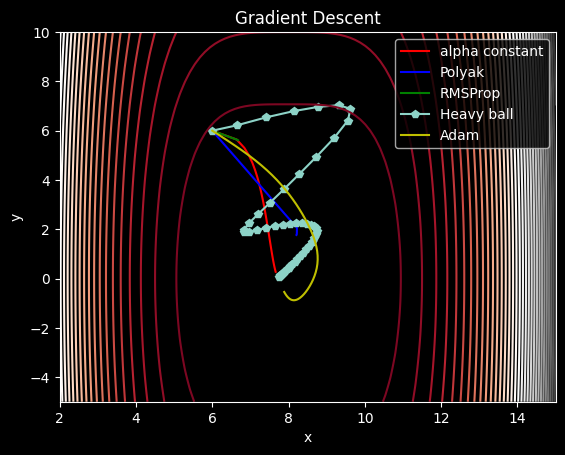

In [13]:
fn = function_A()


start = np.array([6,6])

alpha = 0.01
num_iters = 50
reg = 0.0000001
beta = 0.9


(X, Y, F_xy) = gradDescent_2d(fn,start,alpha,num_iters)
(X_1, Y_1, F_xy_1) = gradDescent_2d_Polyak(fn,start,[2,2],num_iters, reg)
(X_2, Y_2, F_xy_2, steps_X, steps_Y) = gradDescent_2d_RMSProp(fn,start,alpha,num_iters, reg, beta )
(X_3, Y_3, F_xy_3, steps_x, steps_y ) = gradDescent_2d_HeavyBall(fn,start,alpha,num_iters, reg, beta )
(X_4, Y_4, F_xy_4, steps_x, steps_y) = adam(fn,start, 0.2,num_iters, reg, beta1 = 0.9, beta2 = 0.9)

# #plot of funciton
fig = plt.figure()

plt.plot(X, Y, 'r-', label = 'alpha constant')
plt.plot(X_1, Y_1, 'b-', label = 'Polyak')
plt.plot(X_2, Y_2, 'g-', label = 'RMSProp')
plt.plot(X_3, Y_3, 'p-', label = 'Heavy ball')
plt.plot(X_4, Y_4, 'y-', label = 'Adam')
plt.ylabel('y')
plt.xlabel('x')

x = np.linspace(2, 15, 100)
y = np.linspace(-5, 10, 100)
X, Y = np.meshgrid(x, y)
Z = fn.f(X, Y)
plt.contour(X, Y, Z, 50, cmap='RdGy')
plt.title('Gradient Descent')
plt.legend()
plt.show()





In [14]:
def contour_A(fn, title):
    x = np.linspace(2, 15, 100)
    y = np.linspace(-5, 10, 100)
    X, Y = np.meshgrid(x, y)
    Z = fn.f(X, Y)
    plt.contour(X, Y, Z, 50, cmap='RdGy')
    plt.title('Gradient Descent : ' + title)
    plt.legend()
    plt.show()

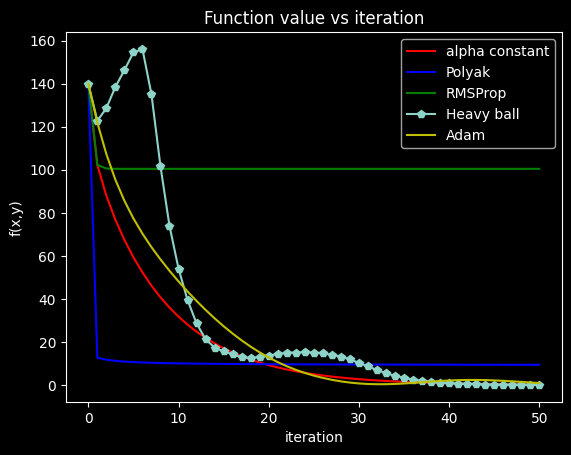

In [15]:
#function value vs iteration
fig = plt.figure()
plt.plot(F_xy, 'r-', label = 'alpha constant')
plt.plot(F_xy_1, 'b-', label = 'Polyak')
plt.plot(F_xy_2, 'g-', label = 'RMSProp')
plt.plot(F_xy_3, 'p-', label = 'Heavy ball')
plt.plot(F_xy_4, 'y-', label = 'Adam')
plt.ylabel('f(x,y)')
plt.xlabel('iteration')
plt.title('Function value vs iteration')
plt.legend()
plt.show()



In [16]:
#function B 

fn = function_B()


start = np.array([10,10])

alpha = 0.1
num_iters = 50
reg = 0.000001
beta = 0.9


(X, Y, F_xy) = gradDescent_2d(fn,start,alpha,num_iters)
(X_1, Y_1, F_xy_1) = gradDescent_2d_Polyak(fn,start,[2,2],num_iters, reg)
(X_2, Y_2, F_xy_2, steps_X, steps_Y) = gradDescent_2d_RMSProp(fn,start,alpha,num_iters, reg, beta )
(X_3, Y_3, F_xy_3) = gradDescent_2d_HeavyBall(fn,start,alpha,num_iters, reg, beta )
(X_4, Y_4, F_xy_4, steps_x, steps_y) = adam(fn,start,0.2,num_iters, reg, beta1 = 0.9, beta2 = 0.9)

# #plot of funciton
fig = plt.figure()

plt.plot(X, Y, 'r-', label = 'alpha constant')
#plt.plot(X_1, Y_1, 'b-', label = 'Polyak')
plt.plot(X_2, Y_2, 'g-', label = 'RMSProp')
plt.plot(X_3, Y_3, 'p-', label = 'Heavy ball')
plt.plot(X_4, Y_4, 'y-', label = 'Adam')
plt.ylabel('y')
plt.xlabel('x')

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = fn.f(X, Y)
plt.contour(X, Y, Z, 25, cmap='RdGy')
plt.title('Gradient Descent')
plt.legend()
plt.show()





ValueError: too many values to unpack (expected 3)

In [ ]:
def contour_B(fn, title):
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(x, y)
    Z = fn.f(X, Y)
    plt.contour(X, Y, Z, 25, cmap='RdGy')
    plt.title('Gradient Descent : ' + title)
    plt.legend()
    plt.show()

    

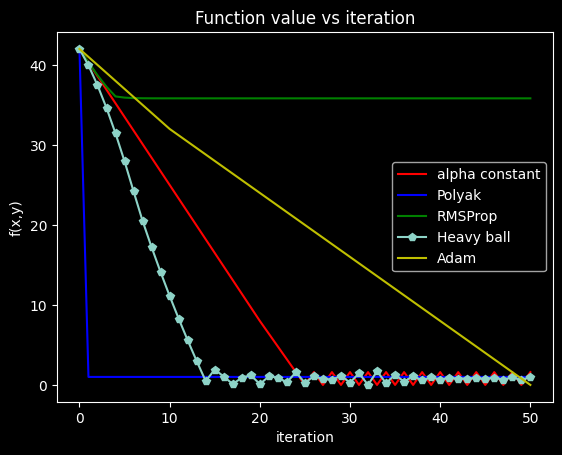

In [ ]:
#function value vs iteration
fig = plt.figure()
plt.plot(F_xy, 'r-', label = 'alpha constant')
plt.plot(F_xy_1, 'b-', label = 'Polyak')
plt.plot(F_xy_2, 'g-', label = 'RMSProp')
plt.plot(F_xy_3, 'p-', label = 'Heavy ball')
plt.plot(F_xy_4, 'y-', label = 'Adam')
plt.ylabel('f(x,y)')
plt.xlabel('iteration')
plt.title('Function value vs iteration')
plt.legend()
plt.show()


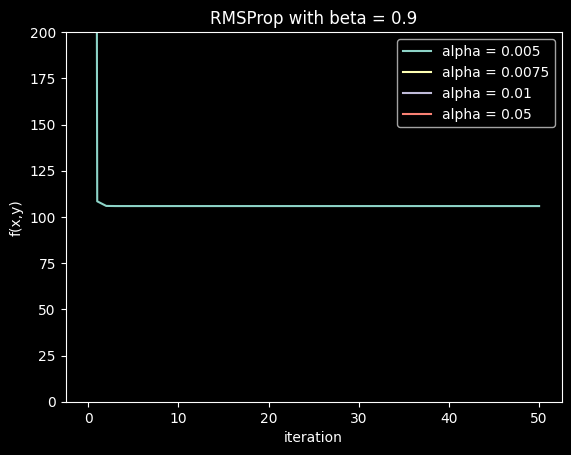

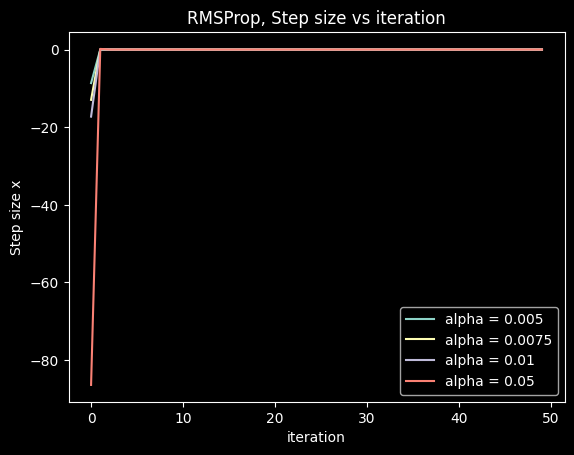

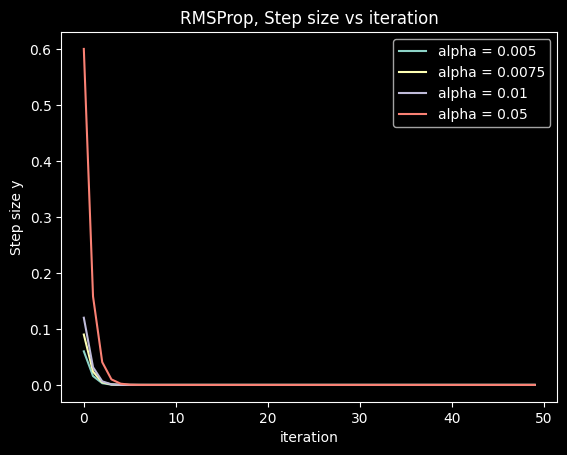

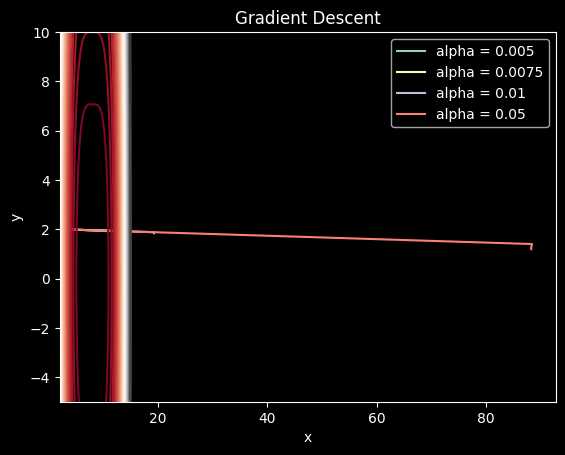

In [ ]:
#hyperparameter tuning for RMSProp

fn = function_A()
alpha_range = [0.005, 0.0075, 0.01, 0.05]

# iterate over learning rates with beta constant
def reset ():
    array_steps_x = []
    array_steps_y = []
    function_values = []
    array_X = []
    array_Y = []
    return array_steps_x, array_steps_y, function_values, array_X, array_Y

array_steps_x, array_steps_y, function_values, array_X, array_Y = reset()
for alpha in alpha_range:
    (X, Y, F_xy, steps_x, steps_y) = gradDescent_2d_RMSProp(fn,[2,2],alpha,50, reg, beta = 0.9 )
    array_steps_x.append(steps_x)
    array_steps_y.append(steps_y)
    function_values.append(F_xy)
    array_X.append(X)
    array_Y.append(Y)

# plot the function values for each learning rate
fig = plt.figure()
for i in range(len(alpha_range)):
    plt.plot(function_values[i],  label = 'alpha = ' + str(alpha_range[i]))
#zoom in on the lower iterations
plt.ylim(0,200)
plt.ylabel('f(x,y)')
plt.xlabel('iteration')
plt.title('RMSProp with beta = 0.9')
plt.legend()
plt.show

# plot steps taken for each learning rate for x
fig = plt.figure()
for i in range(len(alpha_range)):
    plt.plot(array_steps_x[i], label = 'alpha = ' + str(alpha_range[i]))
plt.ylabel('Step size x')
plt.xlabel('iteration')
plt.title('RMSProp, Step size vs iteration')
plt.legend()
plt.show

# plot steps taken for each learning rate for y
fig = plt.figure()
for i in range(len(alpha_range)):
    plt.plot(array_steps_y[i], label = 'alpha = ' + str(alpha_range[i]))
plt.ylabel('Step size y')
plt.xlabel('iteration')
plt.title('RMSProp, Step size vs iteration')
plt.legend()
plt.show

#plot X and Y for each learning rate 
fig = plt.figure()
for i in range(len(alpha_range)):
    plt.plot(array_X[i], array_Y[i], label = 'alpha = ' + str(alpha_range[i]))
plt.ylabel('y')
plt.xlabel('x')
plt.title('RMSProp, X vs Y')


#add a contour plot
x = np.linspace(2, 15, 100)
y = np.linspace(-5, 10, 100)
X, Y = np.meshgrid(x, y)
Z = fn.f(X, Y)
plt.contour(X, Y, Z, 50, cmap='RdGy')
plt.title('Gradient Descent')
plt.legend()
plt.show()







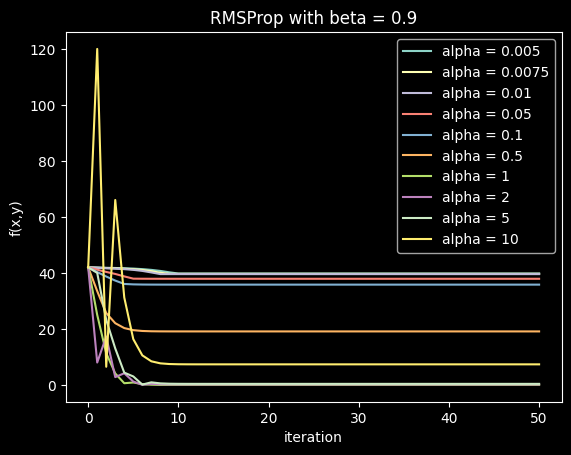

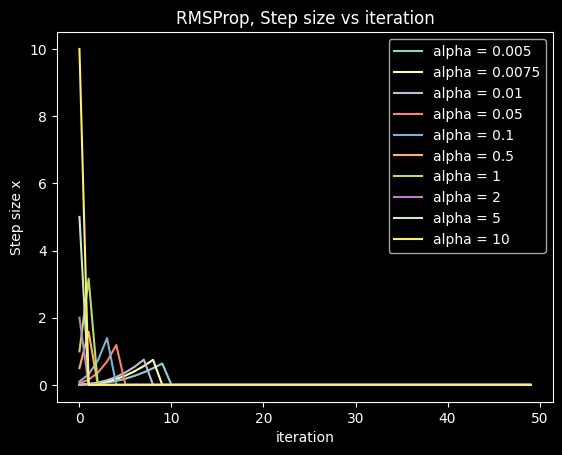

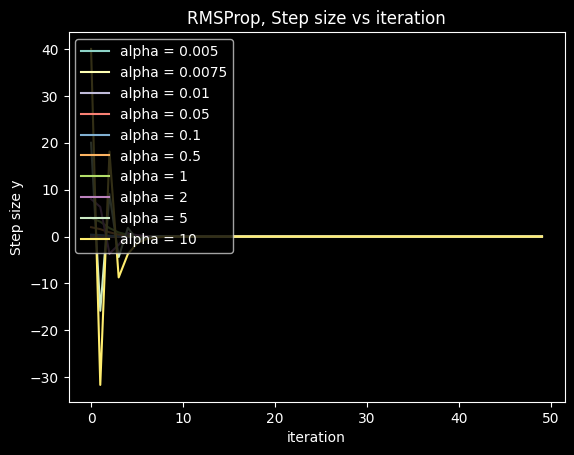

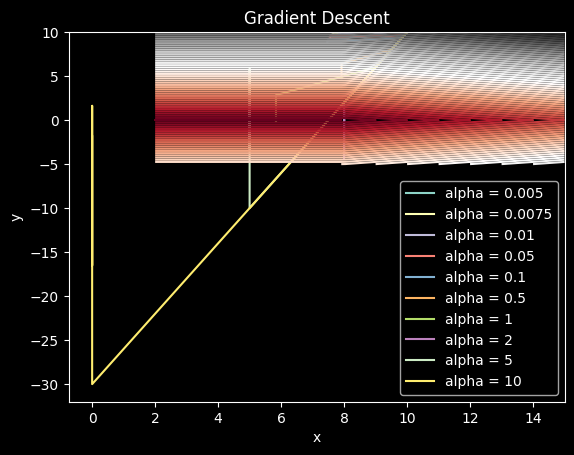

In [ ]:
#now for function B

fn = function_B()

#hyperparameter tuning for RMSProp


alpha_range = [0.005, 0.0075, 0.01, 0.05, 0.1 , 0.5, 1, 2, 5, 10]

# iterate over learning rates with beta constant
def reset ():
    array_steps_x = []
    array_steps_y = []
    function_values = []
    array_X = []
    array_Y = []
    return array_steps_x, array_steps_y, function_values, array_X, array_Y

array_steps_x, array_steps_y, function_values, array_X, array_Y = reset()
for alpha in alpha_range:
    (X, Y, F_xy, steps_x, steps_y) = gradDescent_2d_RMSProp(fn,[10,10],alpha,50, reg, beta = 0.9 )
    array_steps_x.append(steps_x)
    array_steps_y.append(steps_y)
    function_values.append(F_xy)
    array_X.append(X)
    array_Y.append(Y)

# plot the function values for each learning rate
fig = plt.figure()
for i in range(len(alpha_range)):
    plt.plot(function_values[i],  label = 'alpha = ' + str(alpha_range[i]))
#zoom in on the lower iterations

plt.ylabel('f(x,y)')
plt.xlabel('iteration')
plt.title('RMSProp with beta = 0.9')
plt.legend()
plt.show

# plot steps taken for each learning rate for x
fig = plt.figure()
for i in range(len(alpha_range)):
    plt.plot(array_steps_x[i], label = 'alpha = ' + str(alpha_range[i]))
plt.ylabel('Step size x')
plt.xlabel('iteration')
plt.title('RMSProp, Step size vs iteration')
plt.legend()
plt.show

# plot steps taken for each learning rate for y
fig = plt.figure()
for i in range(len(alpha_range)):
    plt.plot(array_steps_y[i], label = 'alpha = ' + str(alpha_range[i]))
plt.ylabel('Step size y')
plt.xlabel('iteration')
plt.title('RMSProp, Step size vs iteration')
plt.legend()
plt.show

#plot X and Y for each learning rate 
fig = plt.figure()
for i in range(len(alpha_range)):
    plt.plot(array_X[i], array_Y[i], label = 'alpha = ' + str(alpha_range[i]))
plt.ylabel('y')
plt.xlabel('x')
plt.title('RMSProp, X vs Y')


#add a contour plot
x = np.linspace(-10, 10, 100)
x = np.linspace(2, 15, 100)
y = np.linspace(-5, 10, 100)
X, Y = np.meshgrid(x, y)
Z = fn.f(X, Y)
plt.contour(X, Y, Z, 50, cmap='RdGy')
plt.title('Gradient Descent')
plt.legend()
plt.show()



0.005
0.0075
0.01
0.05


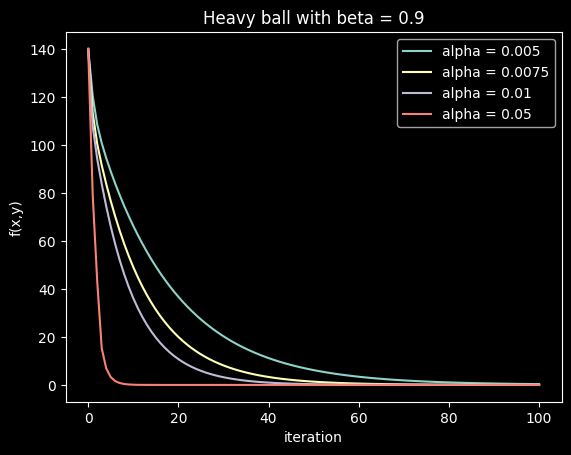

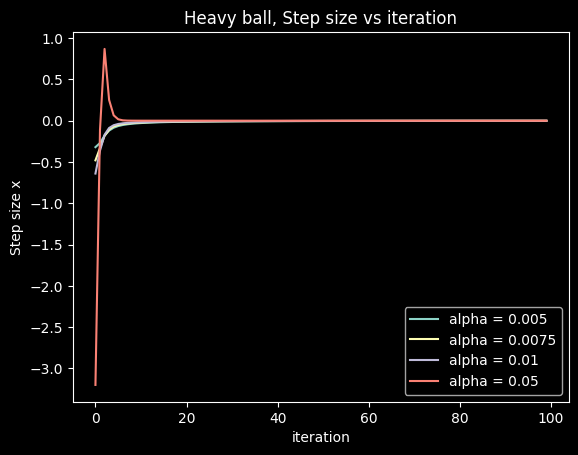

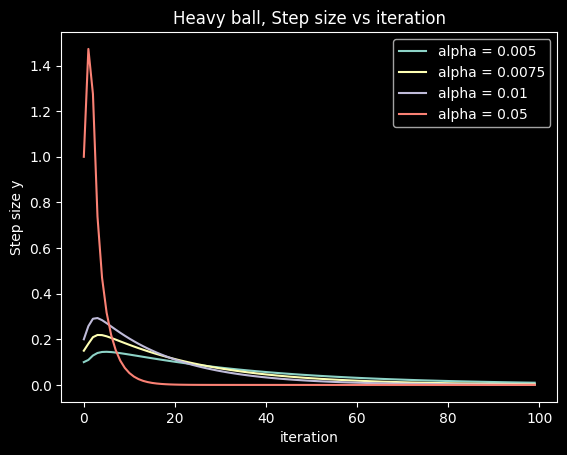

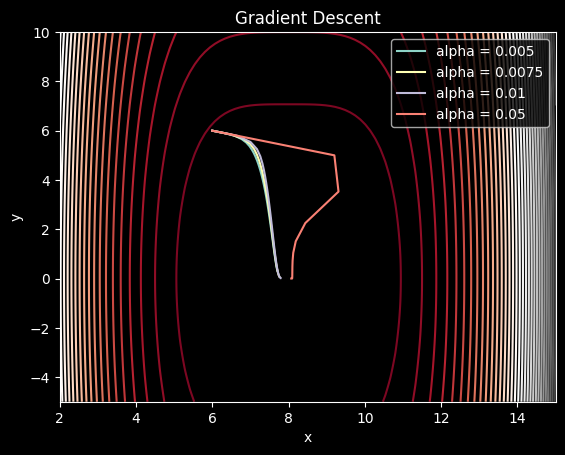

In [ ]:
#---------------------Heavy ball---------------------
# now we look at heaver side function

fn = function_A()

#hyperparameter tuning for Heavy ball


alpha_range = [0.005, 0.0075, 0.01, 0.05,]

# iterate over learning rates with beta constant
def reset ():
    array_steps_x = []
    array_steps_y = []
    function_values = []
    array_X = []
    array_Y = []
    return array_steps_x, array_steps_y, function_values, array_X, array_Y

array_steps_x, array_steps_y, function_values, array_X, array_Y = reset()
for alpha in alpha_range:
    print (alpha)
    (X, Y, F_xy, steps_x, steps_y) = gradDescent_2d_HeavyBall(fn,[6,6],alpha,100, reg, beta = 0.25 )
    array_steps_x.append(steps_x)
    array_steps_y.append(steps_y)
    function_values.append(F_xy)
    array_X.append(X)
    array_Y.append(Y)

# plot the function values for each learning rate
fig = plt.figure()
for i in range(len(alpha_range)):
    plt.plot(function_values[i],  label = 'alpha = ' + str(alpha_range[i]))
#zoom in on the lower iterations

plt.ylabel('f(x,y)')
plt.xlabel('iteration')
plt.title('Heavy ball with beta = 0.9')
plt.legend()
plt.show


# plot steps taken for each learning rate for x
fig = plt.figure()
for i in range(len(alpha_range)):
    plt.plot(array_steps_x[i], label = 'alpha = ' + str(alpha_range[i]))
plt.ylabel('Step size x')
plt.xlabel('iteration')
plt.title('Heavy ball, Step size vs iteration')
plt.legend()
plt.show

# plot steps taken for each learning rate for y
fig = plt.figure()
for i in range(len(alpha_range)):
    plt.plot(array_steps_y[i], label = 'alpha = ' + str(alpha_range[i]))
plt.ylabel('Step size y')
plt.xlabel('iteration')
plt.title('Heavy ball, Step size vs iteration')
plt.legend()
plt.show

#plot X and Y for each learning rate
fig = plt.figure()
for i in range(len(alpha_range)):
    plt.plot(array_X[i], array_Y[i], label = 'alpha = ' + str(alpha_range[i]))
plt.ylabel('y')
plt.xlabel('x')
plt.title('Heavy ball, X vs Y')


#add a contour plot
x = np.linspace(2, 15, 100)
y = np.linspace(-5, 10, 100)
X, Y = np.meshgrid(x, y)
Z = fn.f(X, Y)
plt.contour(X, Y, Z, 50, cmap='RdGy')
plt.title('Gradient Descent')
plt.legend()
plt.show()





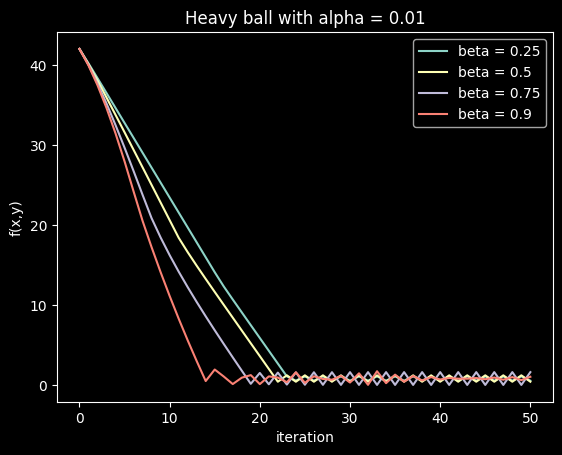

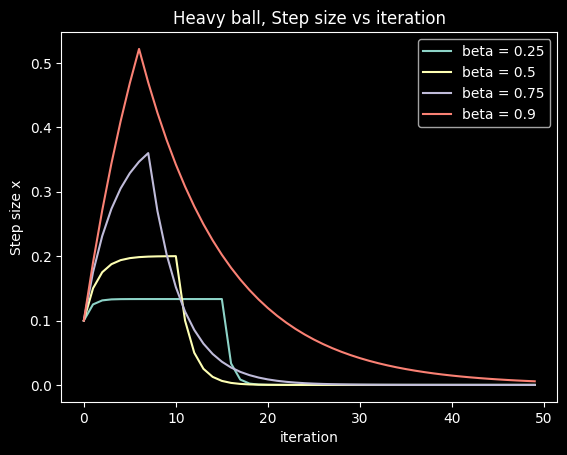

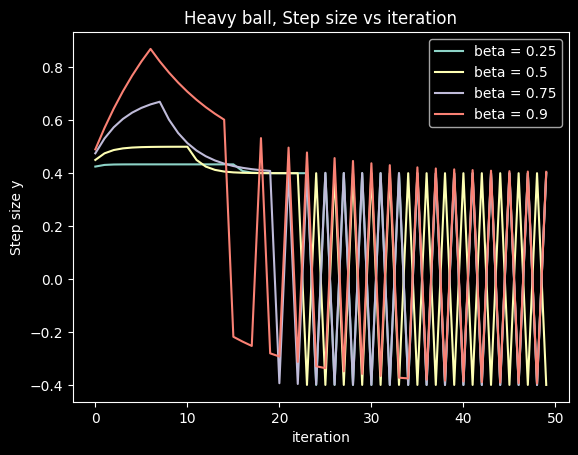

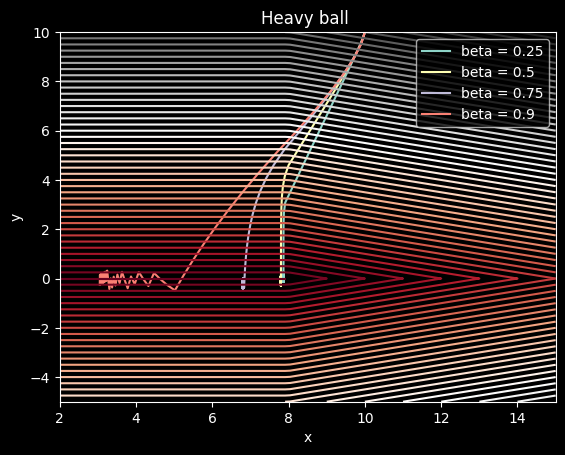

In [ ]:
#---------------------Heavy ball---------------------
# now we look at heaver side function

fn = function_B()

#hyperparameter tuning for Heavy ball


beta_range = [0.25, 0.5, 0.75, 0.9]

# iterate over learning rates with beta constant
def reset ():
    array_steps_x = []
    array_steps_y = []
    function_values = []
    array_X = []
    array_Y = []
    return array_steps_x, array_steps_y, function_values, array_X, array_Y

array_steps_x, array_steps_y, function_values, array_X, array_Y = reset()
for beta in beta_range:
   
    (X, Y, F_xy, steps_x, steps_y) = gradDescent_2d_HeavyBall(fn,[10,10],0.1,50, reg, beta  )
    array_steps_x.append(steps_x)
    array_steps_y.append(steps_y)
    function_values.append(F_xy)
    array_X.append(X)
    array_Y.append(Y)

# plot the function values for each learning rate
fig = plt.figure()
for i in range(len(beta_range)):
    plt.plot(function_values[i],  label = 'beta = ' + str(beta_range[i]))
#zoom in on the lower iterations

plt.ylabel('f(x,y)')
plt.xlabel('iteration')
plt.title('Heavy ball with alpha = 0.01')
plt.legend()
plt.show


# plot steps taken for each learning rate for x
fig = plt.figure()
for i in range(len(beta_range)):
    plt.plot(array_steps_x[i], label = 'beta = ' + str(beta_range[i]))
plt.ylabel('Step size x')
plt.xlabel('iteration')
plt.title('Heavy ball, Step size vs iteration')
plt.legend()
plt.show

# plot steps taken for each learning rate for y
fig = plt.figure()
for i in range(len(beta_range)):
    plt.plot(array_steps_y[i], label = 'beta = ' + str(beta_range[i]))
plt.ylabel('Step size y')
plt.xlabel('iteration')
plt.title('Heavy ball, Step size vs iteration')
plt.legend()
plt.show

#plot X and Y for each learning rate
fig = plt.figure()
for i in range(len(beta_range)):
    plt.plot(array_X[i], array_Y[i], label = 'beta = ' + str(beta_range[i]))
plt.ylabel('y')
plt.xlabel('x')
plt.title('Heavy ball, X vs Y')


#add a contour plot
x = np.linspace(2, 15, 100)
y = np.linspace(-5, 10, 100)
X, Y = np.meshgrid(x, y)
Z = fn.f(X, Y)
plt.contour(X, Y, Z, 50, cmap='RdGy')
plt.title('Heavy ball ')
plt.legend()
plt.show()




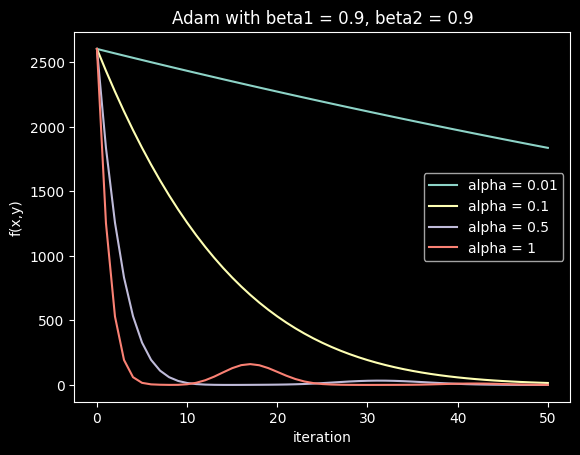

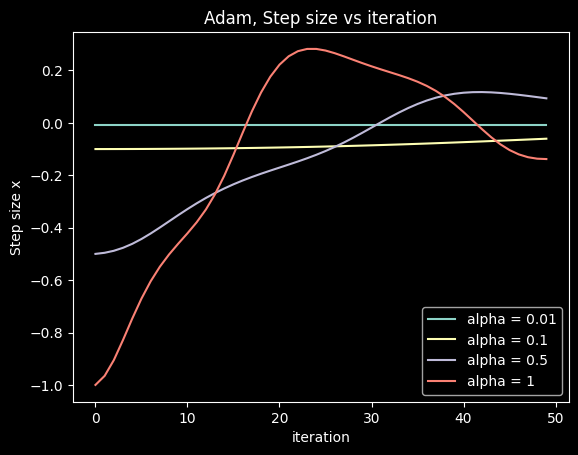

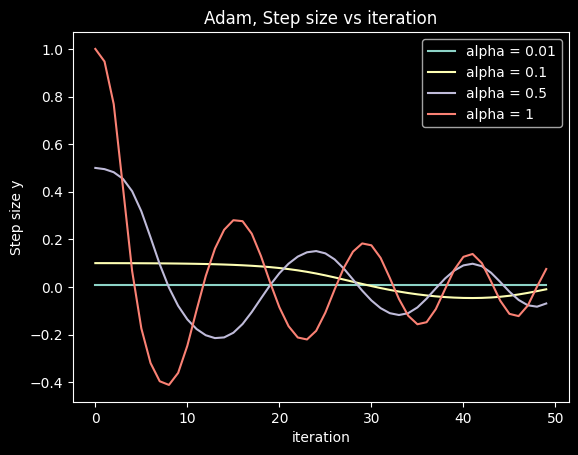

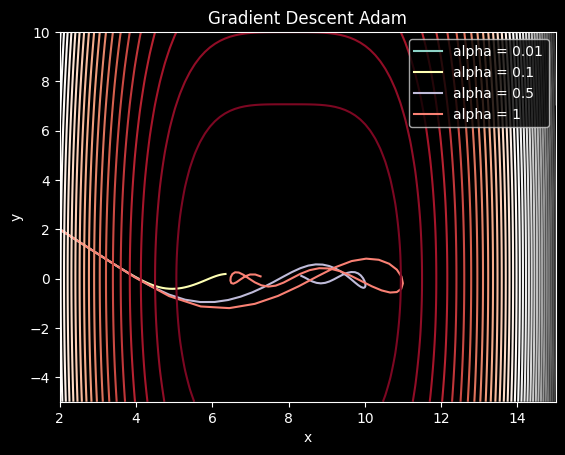

In [ ]:
#---------------------Adam---------------------

fn = function_A()
#hyperparameter tuning for Adam

alpha_range = [0.01, 0.1, 0.5, 1]
beta1_range = [0.25, 0.5, 0.75, 0.9]
beta2_range = [0.25, 0.5, 0.75, 0.9]

# iterate over learning rates with beta constant
def reset ():
    array_steps_x = []
    array_steps_y = []
    function_values = []
    array_X = []
    array_Y = []
    return array_steps_x, array_steps_y, function_values, array_X, array_Y

array_steps_x, array_steps_y, function_values, array_X, array_Y = reset()
for alpha in alpha_range:
       
    (X, Y, F_xy, steps_x, steps_y) = adam(fn,[2,2],alpha,num_iters, reg, beta1 = 0.9, beta2 = 0.9)
    array_steps_x.append(steps_x)
    array_steps_y.append(steps_y)
    function_values.append(F_xy)
    array_X.append(X)
    array_Y.append(Y)

# plot the function values for each learning rate
fig = plt.figure()
for i in range(len(alpha_range)):
    plt.plot(function_values[i],  label = 'alpha = ' + str(alpha_range[i]))
#zoom in on the lower iterations

plt.ylabel('f(x,y)')
plt.xlabel('iteration')
plt.title('Adam with beta1 = 0.9, beta2 = 0.9')
plt.legend()
plt.show

# plot steps taken for each learning rate for x
fig = plt.figure()
for i in range(len(alpha_range)):
    plt.plot(array_steps_x[i], label = 'alpha = ' + str(alpha_range[i]))
plt.ylabel('Step size x')
plt.xlabel('iteration')
plt.title('Adam, Step size vs iteration')
plt.legend()
plt.show

# plot steps taken for each learning rate for y
fig = plt.figure()
for i in range(len(alpha_range)):
    plt.plot(array_steps_y[i], label = 'alpha = ' + str(alpha_range[i]))
plt.ylabel('Step size y')
plt.xlabel('iteration')
plt.title('Adam, Step size vs iteration')
plt.legend()
plt.show

# #plot X and Y for each learning rate
fig = plt.figure()
for i in range(len(alpha_range)):
    plt.plot(array_X[i], array_Y[i], label = 'alpha = ' + str(alpha_range[i]))
plt.ylabel('y')
plt.xlabel('x')
plt.title('Adam, X vs Y')


#add a contour plot
contour_A(fn, 'Adam')




    

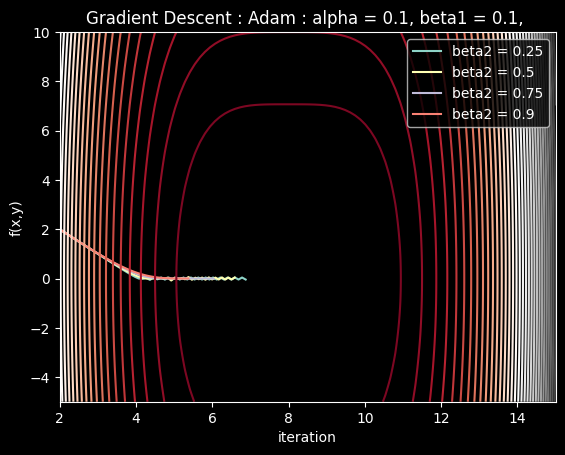

In [37]:
# hyperparameter tuning for Adam

fn = function_A()
beta1_range = [0.25, 0.5, 0.75, 0.9]
beat_2_range = [0.25, 0.5, 0.75, 0.9]


# iterate over learning rates with beta constant
def reset ():
    array_steps_x = []
    array_steps_y = []
    function_values = []
    array_X = []
    array_Y = []
    return array_steps_x, array_steps_y, function_values, array_X, array_Y

array_steps_x, array_steps_y, function_values, array_X, array_Y = reset()
for beta1 in beta1_range:
       
    (X, Y, F_xy, steps_x, steps_y) = adam(fn,[2,2],0.1,num_iters, reg, 0.1, beta1)
    array_steps_x.append(steps_x)
    array_steps_y.append(steps_y)
    function_values.append(F_xy)
    array_X.append(X)
    array_Y.append(Y)

# plot the X values for each learning rate
fig = plt.figure()
for i in range(len(beta1_range)):
    plt.plot(array_X[i],array_Y[i], label = 'beta2 = ' + str(beta1_range[i]))

plt.ylabel('f(x,y)')
plt.xlabel('iteration')
plt.title('Adam with alpha = 0.1')
plt.legend()
plt.show

contour_A(fn, 'Adam : alpha = 0.1, beta1 = 0.1, ')


<function matplotlib.pyplot.show(close=None, block=None)>

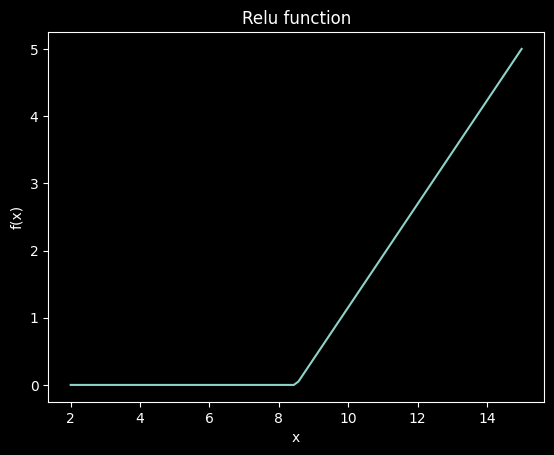

In [ ]:
#plot relu function

fn =   function_relu()

#plot relu function

fig = plt.figure()
X = np.linspace(-5, 5, 100)
Y = fn.f(X)
plt.plot(x, Y)
plt.ylabel('f(x)')
plt.xlabel('x')
plt.title('Relu function')
plt.show




C:\Users\dan\AppData\Local\Temp\ipykernel_11384\4009535629.py:30: RuntimeWarning: overflow encountered in double_scalars
  alpha_x = alpha_x/(np.sqrt(sum_x)+reg)
C:\Users\dan\AppData\Local\Temp\ipykernel_11384\4009535629.py:32: RuntimeWarning: overflow encountered in double_scalars
  alpha_y = alpha_y/(np.sqrt(sum_y)+reg)
C:\Users\dan\AppData\Local\Temp\ipykernel_11384\4009535629.py:16: RuntimeWarning: invalid value encountered in double_scalars
  step_x = alpha_x*fn.dfdx(x) #step size for x
C:\Users\dan\AppData\Local\Temp\ipykernel_11384\4009535629.py:17: RuntimeWarning: invalid value encountered in double_scalars
  step_y = alpha_y*fn.dfdy(y) # step size for y


<function matplotlib.pyplot.show(close=None, block=None)>

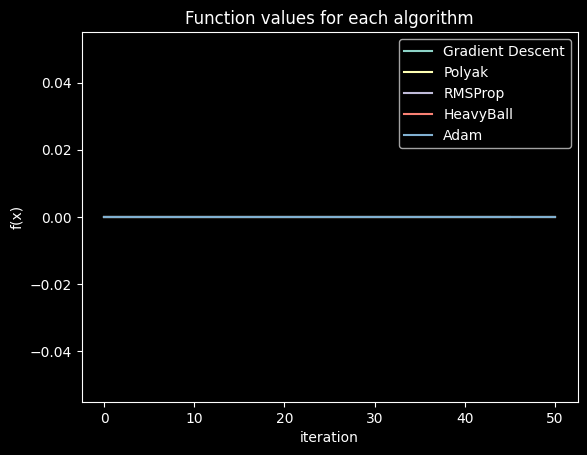

In [ ]:
# i) For initial condition x = −1 run each of the algorithms you’ve implemented
# (use reasonable parameter values for each algorithm based on part (b)). What
# happens, and why?
fn = function_relu()
start = [-1, 0]

(X, Y, F_xy) = gradDescent_2d(fn,start,alpha,num_iters)
(X_1, Y_1, F_xy_1) = gradDescent_2d_Polyak(fn,start,[2,2],num_iters, reg)
(X_2, Y_2, F_xy_2, steps_X, steps_Y) = gradDescent_2d_RMSProp(fn,start,alpha,num_iters, reg, beta )
(X_3, Y_3, F_xy_3, steps_x, steps_y ) = gradDescent_2d_HeavyBall(fn,start,alpha,num_iters, reg, beta )
(X_4, Y_4, F_xy_4, steps_x, steps_y) = adam(fn,start, 0.2,num_iters, reg, beta1 = 0.9, beta2 = 0.9)

#plot the function values for each algorithm
fig = plt.figure()
plt.plot(F_xy, label = 'Gradient Descent')
plt.plot(F_xy_1, label = 'Polyak')
plt.plot(F_xy_2, label = 'RMSProp')
plt.plot(F_xy_3, label = 'HeavyBall')
plt.plot(F_xy_4, label = 'Adam')
plt.ylabel('f(x)')
plt.xlabel('iteration')
plt.title('Function values for each algorithm')
plt.legend()
plt.show


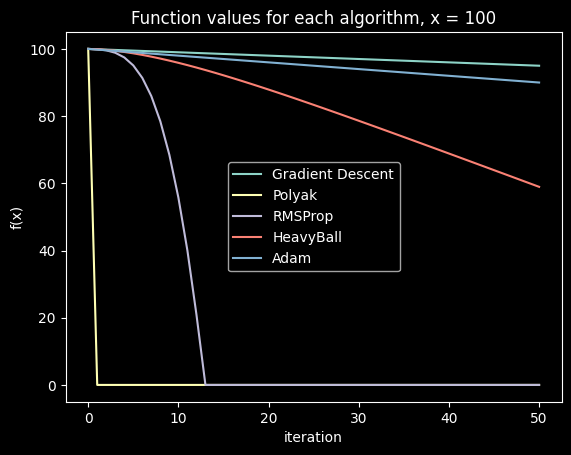

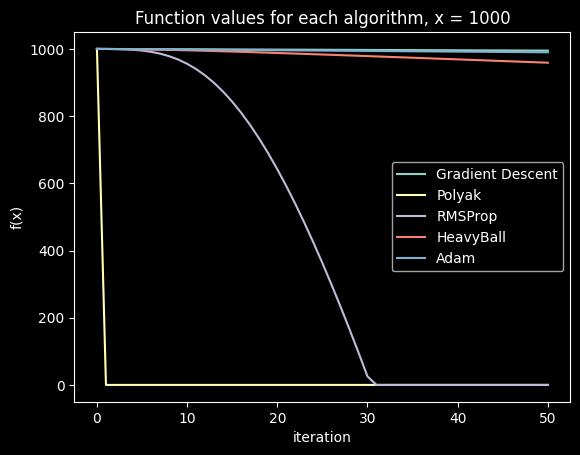

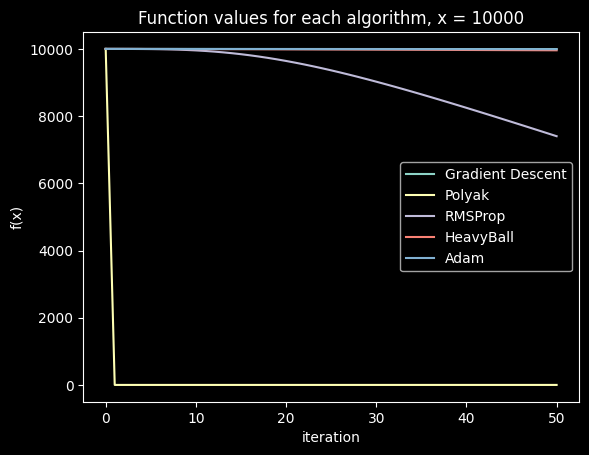

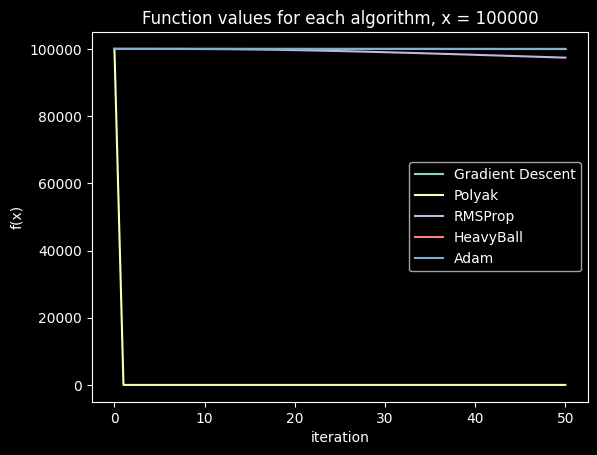

In [28]:
# (ii) Now look at initial condition x = +1 and repeat. How does the behaviour
# change, and why?

fn = function_relu()
l = [100,1000, 10000, 100000	]	
start = [0, 0]
num_iters = 50

for i in range(len(l)):
    start[0] = l[i]
    start[1] = 0
    (X, Y, F_xy) = gradDescent_2d(fn,start,alpha,num_iters)
    (X_1, Y_1, F_xy_1) = gradDescent_2d_Polyak(fn,start,[2,2],num_iters, reg)
    (X_2, Y_2, F_xy_2, steps_X, steps_Y) = gradDescent_2d_RMSProp(fn,start,alpha,num_iters, reg, beta )
    (X_3, Y_3, F_xy_3, steps_x, steps_y ) = gradDescent_2d_HeavyBall(fn,start,alpha,num_iters, reg, beta )
    (X_4, Y_4, F_xy_4, steps_x, steps_y) = adam(fn,start, 0.2,num_iters, reg, beta1 = 0.9, beta2 = 0.9)

    #plot the function values for each algorithm
    fig = plt.figure()
    plt.plot(F_xy, label = 'Gradient Descent')
    plt.plot(F_xy_1, label = 'Polyak')
    plt.plot(F_xy_2, label = 'RMSProp')
    plt.plot(F_xy_3, label = 'HeavyBall')
    plt.plot(F_xy_4, label = 'Adam')
    plt.ylabel('f(x)')
    plt.xlabel('iteration')
    plt.title('Function values for each algorithm, x = ' + str(start[0]))
    plt.legend()
    plt.show